Name    : Neeraj Kumar Kannoujiya
Roll No : MSD2024017

**Importing necessary Libraries**

In [73]:
import itertools
import pandas as pd
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
from collections import defaultdict
import random

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Implement the function of Hash-based apriori**

In [74]:
def hash_apriori(transactions, min_support):
    def get_frequent_itemsets(itemsets, support_counts, min_support):
        frequent_itemsets = []
        for itemset in itemsets:
            if support_counts[itemset] >= min_support:
                frequent_itemsets.append((itemset, support_counts[itemset]))
        return frequent_itemsets

    def generate_candidates(frequent_itemsets, k):
        candidates = []
        for i in range(len(frequent_itemsets)):
            for j in range(i + 1, len(frequent_itemsets)):
                candidate = tuple(sorted(set(frequent_itemsets[i][0]) | set(frequent_itemsets[j][0])))
                if len(candidate) == k and candidate not in candidates:
                    candidates.append(candidate)
        return candidates

    def hash_function(itemset):
        return sum([hash(item) for item in itemset]) % hash_table_size

    hash_table_size = 100
    hash_table = defaultdict(int)

    candidate_1_itemsets = set()
    for transaction in transactions:
        for item in transaction:
            candidate_1_itemsets.add((item,))

    support_counts = defaultdict(int)
    for transaction in transactions:
        for itemset in candidate_1_itemsets:
            if set(itemset).issubset(transaction):
                support_counts[itemset] += 1

    frequent_itemsets = get_frequent_itemsets(candidate_1_itemsets, support_counts, min_support)
    all_frequent_itemsets = frequent_itemsets.copy()

    k = 2
    while frequent_itemsets:
        candidates_k_itemsets = generate_candidates(frequent_itemsets, k)
        support_counts = defaultdict(int)

        for transaction in transactions:
            for candidate in candidates_k_itemsets:
                if set(candidate).issubset(transaction):
                    hash_value = hash_function(candidate)
                    hash_table[hash_value] += 1
                    support_counts[candidate] += 1

        frequent_itemsets = get_frequent_itemsets(candidates_k_itemsets, support_counts, min_support)
        all_frequent_itemsets.extend(frequent_itemsets)
        k += 1

    return all_frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Generate The Custom Dataset for applying Hash-based Apriori**

In [78]:
def generate_random_dataset(num_transactions, num_items, max_items_per_transaction):
    items = [f"item_{i}" for i in range(num_items)]
    transactions = []
    for _ in range(num_transactions):
        num_items_in_transaction = random.randint(1, max_items_per_transaction)
        transaction = random.sample(items, num_items_in_transaction)
        transactions.append(transaction)
    return transactions


# Example usage:
num_transactions = 200
num_items = 40
max_items_per_transaction = 8

transactions = generate_random_dataset(num_transactions, num_items, max_items_per_transaction)




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Generating The association rules**

In [82]:
min_support = 2.0

# Run the hash-based Apriori algorithm
frequent_itemsets_with_support = hash_apriori(transactions, min_support)

# Convert frequent itemsets to a DataFrame
frequent_itemsets_df = pd.DataFrame(frequent_itemsets_with_support, columns=['itemsets', 'support'])
frequent_itemsets_df['support'] = frequent_itemsets_df['support'] / num_transactions  # Normalize support

# Generate association rules from the frequent itemsets
minimum_confidence = 0.2  # Set a lower minimum confidence to find more rules
rules = association_rules(frequent_itemsets_df, metric="confidence", min_threshold=minimum_confidence)
print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


            antecedents                  consequents  antecedent support  \
0             (item_22)                    (item_26)               0.115   
1              (item_0)                    (item_22)               0.150   
2             (item_22)                     (item_0)               0.115   
3             (item_22)                    (item_18)               0.115   
4             (item_18)                    (item_22)               0.125   
...                 ...                          ...                 ...   
2546  (item_7, item_33)   (item_27, item_3, item_39)               0.040   
2547  (item_3, item_33)   (item_27, item_7, item_39)               0.025   
2548   (item_7, item_3)  (item_27, item_39, item_33)               0.040   
2549  (item_7, item_39)   (item_27, item_3, item_33)               0.030   
2550  (item_3, item_39)   (item_27, item_7, item_33)               0.035   

      consequent support  support  confidence       lift  leverage  \
0                

**Visualize the relationship between support and confidence**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


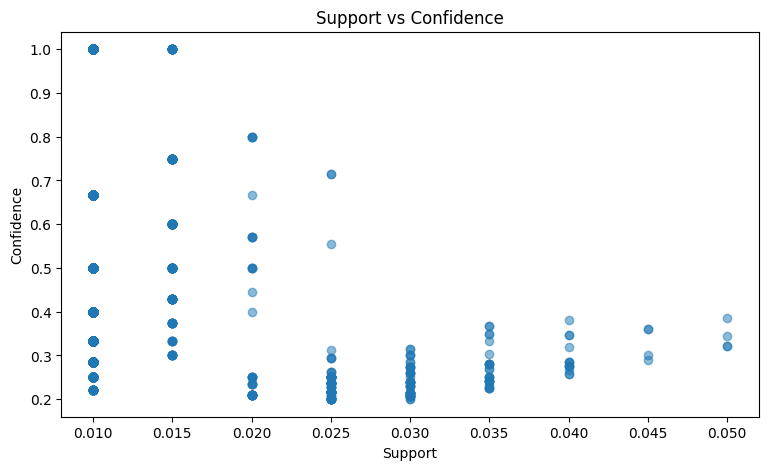

                      antecedents                  consequents  \
2469            (item_2, item_31)   (item_21, item_7, item_24)   
2466   (item_21, item_7, item_24)            (item_2, item_31)   
2487  (item_13, item_12, item_15)           (item_35, item_37)   
2498           (item_35, item_37)  (item_13, item_12, item_15)   
2016             (item_4, item_6)           (item_38, item_31)   
2019           (item_38, item_31)             (item_4, item_6)   
2493           (item_12, item_37)  (item_13, item_35, item_15)   
2492  (item_13, item_35, item_15)           (item_12, item_37)   
2156           (item_29, item_28)           (item_18, item_23)   
1826            (item_2, item_31)           (item_21, item_24)   

      antecedent support  consequent support  support  confidence        lift  \
2469               0.010               0.010     0.01    1.000000  100.000000   
2466               0.010               0.010     0.01    1.000000  100.000000   
2487               0.015      

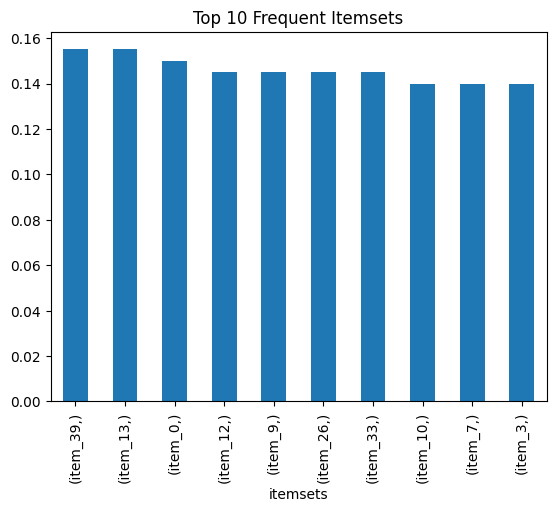

In [83]:

plt.figure(figsize=(9, 5))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

# Display the top 10 rules sorted by lift
top_10_rules_df = rules.sort_values(by='lift', ascending=False).head(10)
print(top_10_rules_df)

# Visualize the top 10 frequent itemsets by their support
frequent_itemsets_df.sort_values(by='support', ascending=False).head(10).plot(
    kind='bar', x='itemsets', y='support', legend=False, title='Top 10 Frequent Itemsets'
)
plt.show()